#  Part II- Intro to Data Visualization with Python 

### Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [2]:
#Set path

path = r"C:\Users\marce\Documents\Instacart Basket Analysis"


In [3]:
# Import opc_merged.pkl

df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opc_merged.pkl'))

### Checking imported file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404161 entries, 0 to 32404160
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float16 
 7   add_to_cart_order       float16 
 8   reordered               float16 
 9   product_name            object  
 10  aisle_id                int8    
 11  department_id           int8    
 12  prices                  float16 
 13  price_range_loc         object  
 14  busiest_day             object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int8    
 18  loyalty_flag            object  
 19  mean_prices             float32 
 20  spender_level           object  
 21  median

In [5]:
df.shape

(32404161, 31)

## Histogram


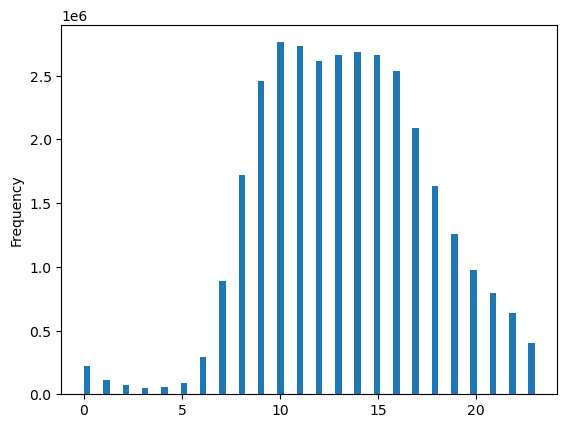

In [6]:
# Create a histogram of the 'order_hour_of_day' column

hist = df['order_hour_of_day'].plot.hist(bins = 70)


#### Most orders are made between 9:00 am and  4:00 pm and the fewest orders between 0:00 am and 6:00 am




In [7]:
df['order_hour_of_day'].value_counts(dropna=False)

10    2761700
11    2736077
14    2689083
15    2662082
13    2660906
12    2618479
16    2535141
9     2454151
17    2087598
8     1718068
18    1636473
19    1258275
20     976138
7      891030
21     795624
22     634220
23     402310
6      290487
0      218767
1      115700
5       87959
2       69372
4       53241
3       51280
Name: order_hour_of_day, dtype: int64

## Bar Chart

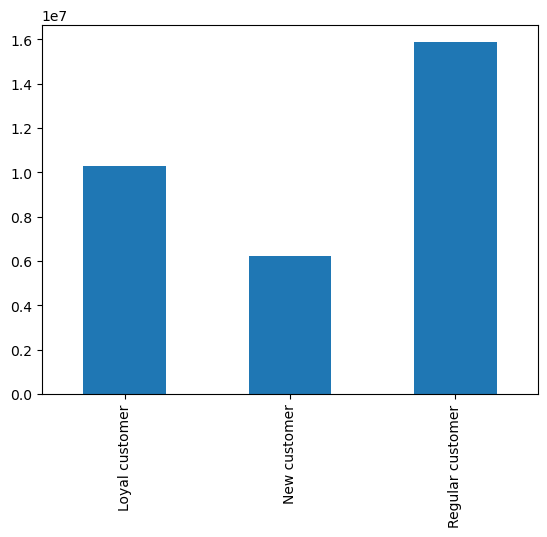

In [8]:
# Create Bar Chart for the 'loyalty_flag' column

bar = df['loyalty_flag'].value_counts().sort_index().plot.bar()

## Creating a Sample 

In [9]:
# Create a list holding Frue/False values to the test np.random.rand() <= 0.7 with random number(seed) '4'

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True, False])

In [11]:
np.random.rand(10)

array([0.15311818, 0.81786511, 0.20691209, 0.46877994, 0.64491806,
       0.17090853, 0.00833434, 0.18474633, 0.63848856, 0.5795878 ])

In [12]:
len(df)

32404161

In [13]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [14]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [15]:
len(big) + len (small)

32404161

In [16]:
# Create  a new dataframe that contains only the 'prices' and 'order_hour_of_day' columns from the small subset

df_2= small[['order_hour_of_day','prices']]

In [ ]:
# Export data to pkl

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_2.pkl')

## Line Chart 

In [ ]:
# Create the Line Chart

line = sns.lineplot(data = df_2, x ='order_hour_of_day',y = 'prices')



## Customer Demographics 

In [18]:
# Create new data frame that contains only the 'age ' and 'dependants_number' columns from the small subset

df_3= small[['age','dependants_number']]


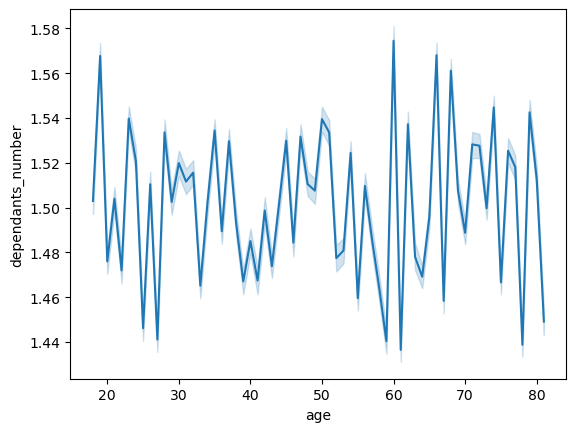

In [19]:
# Create Line Chart for 'age ' and 'dependants_number'

line_2 = sns.lineplot(data = df_3, x ='age',y = 'dependants_number')

#### No trend is observed, with relatively similar results for all age groups.

## Scatterplot


In [20]:
# Create new data frame that contains only the 'age ' and 'income' columns from the small subset

df_4= small[['age','income']]

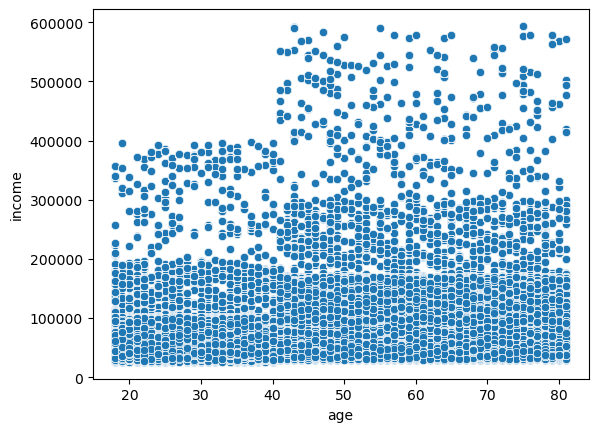

In [21]:
# Crearte a scatterplot of the 'age ' and 'income' columns

sctpl=sns.scatterplot(x = 'age', y = 'income', data = df_4)

#### Most of the clients have incomes below 200,000, but starting with the age of 40, a higher salary of up to 300,000 prevails. A salary higher than 400,000 can only be observed among customers over 40.


## Export visualizations as “.png” files 

In [22]:
# Export histogram

hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_order_hod.png'))


In [23]:
# Export Bar Chart

bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_loyalty.png'))


In [24]:
# Export line chart

line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_prices.png'))

In [25]:
# Export line chart

line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_age_dependants.png'))

In [26]:
# Export Scatterplot

sctpl.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'sctpl_age_income.png'))